# Bikeshare EDA

*Anna, Tiffany, Tina, Tres, Giulia*

## Data Engineering (Basic)

1. Read in CSVs
2. Compile CSVs
3. Examine stations

In [3]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from matplotlib.ticker import PercentFormatter

import geopandas as gpd

plt.rcParams["figure.figsize"] = (15,10)


In [4]:
path = os.getcwd() + "/data/raw/trips"
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
trips_df = pd.DataFrame()

# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    current_csv = pd.read_csv(f)
    trips_df = trips_df.append(current_csv)
    # print the location and filename
    #print('Location:', f)
    #print('File Name:', f.split("\\")[-1])
      
    # print the content
    #print('Content:')
    #display(trips_df)
    #print()


<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_df = trips_df.append(current_csv)
<ipython-input-4-425413b88901>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [6]:
trips_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,birth year,gender
0,259,2020-07-01 00:01:15.0430,2020-07-01 00:05:34.1010,16,Back Bay T Stop - Dartmouth St at Stuart St,42.348074,-71.076570,26,Washington St at Waltham St,42.341575,-71.068904,6059,Subscriber,02118,NaN,NaN
1,436,2020-07-01 00:03:39.1810,2020-07-01 00:10:55.4600,6,Cambridge St at Joy St,42.361257,-71.065287,152,Ink Block - Harrison Ave at Herald St,42.345901,-71.063187,2322,Customer,02114,NaN,NaN
2,1346,2020-07-01 00:04:27.0790,2020-07-01 00:26:53.2030,404,Mass Ave T Station,42.341356,-71.083370,167,Ryan Playground - Dorchester Ave at Harbor Vie...,42.317642,-71.056664,4062,Customer,NaN,NaN,NaN
3,2069,2020-07-01 00:04:56.0140,2020-07-01 00:39:25.1100,436,Maverick St at Massport Path,42.367741,-71.033360,436,Maverick St at Massport Path,42.367741,-71.03336,3858,Subscriber,02128,NaN,NaN
4,1266,2020-07-01 00:05:43.0180,2020-07-01 00:26:49.0580,404,Mass Ave T Station,42.341356,-71.083370,167,Ryan Playground - Dorchester Ave at Harbor Vie...,42.317642,-71.056664,6031,Customer,NaN,NaN,NaN


In [623]:
stations = pd.read_csv("data/raw/stations/current_bluebikes_stations.csv")
stations.columns = stations.iloc[0]
stations = stations.drop(stations.index[0])

In [639]:
# Set as datetime object
trips_df['starttime'] = pd.to_datetime(trips_df["starttime"], format='%Y-%m-%d %H:%M:%S.%f')
trips_df['stoptime'] = pd.to_datetime(trips_df["stoptime"], format='%Y-%m-%d %H:%M:%S.%f')

In [638]:
trips_df.iloc[0]['starttime']

'2020-07-01 00:01:15.0430'

# EDA

## Data Integrity

Per the BlueBike data: 

>The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).

if `tripduration` is the only variable they looked at then we'll probably need to look at others for completion.

### Nulls

Checking for NaN values (doesn't include values that should be considered outside the range of normalcy - explored later)

In [640]:
missing_data = trips_df.isnull()
missing_data.sum()

tripduration                     0
starttime                        0
stoptime                         0
start station id                 0
start station name               0
start station latitude           0
start station longitude          0
end station id                   0
end station name                 0
end station latitude             0
end station longitude            0
bikeid                           0
usertype                         0
postal code                8996434
birth year                 6907177
gender                     6897585
dtype: int64

Looks like there are some demographic data missing (maybe not collected if user has set their privacy settings). Approximately 50% of `postal code`, `birth year` and `gender` variables are missing:

In [641]:
print(missing_data.sum()['postal code'] / len(trips_df))
print(missing_data.sum()['birth year'] / len(trips_df))
print(missing_data.sum()['gender'] / len(trips_df))

#demogrpahic info missing? 

0.5889000831529221
0.4521388263007266
0.45151094089662064


### Out-of-bound numeric values

What about numeric values that are inaccurate and/or unreasonable in reality?

In [642]:
trips_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,tripduration,start station id,start station latitude,start station longitude,bikeid,gender
count,1.52767e+07,1.52767e+07,1.52767e+07,1.52767e+07,1.52767e+07,8.37909e+06
mean,1685.62,138.968,42.3575,-71.0881,3364.19,1.07196
std,52119.9,128.474,0.0688872,0.115178,2054.1,0.59978
min,61,1,0,-73.5669,1,0
25%,426,50,42.3485,-71.1055,1561,1
50%,720,90,42.3581,-71.0898,3262,1
75%,1216,183,42.3662,-71.0691,5016,1
max,4.25671e+07,572,45.5051,0,8129,2


In [714]:
bins=[0, 5000,10000,15000, 20000, 25000, 30000,90000]
trips_df.groupby(pd.cut(trips_df.tripduration, bins)).size()

tripduration
(0, 5000]         14993208
(5000, 10000]       210330
(10000, 15000]       26851
(15000, 20000]        8545
(20000, 25000]        4082
(25000, 30000]        2873
(30000, 90000]       17173
dtype: int64

### Non-numeric values

Anything weird about the names of stations? (We should use station ids most likely instead of these values)

In [643]:
unique_start_name = trips_df["start station name"].unique()
unique_end_name = trips_df["end station name"].unique()
    
print(len(unique_start_name), "unique start names")
print(len(unique_end_name), "unique end names")

print("end names not in start names:", [i for i in unique_end_name if i not in unique_start_name])
print("start names not in end names:", [i for i in unique_start_name if i not in unique_end_name])

672 unique start names
675 unique end names
end names not in start names: ['\\N', 'Warehouse Lab PBSC', 'Lab PBSC', 'Mobile Temporary Station 1']
start names not in end names: ['MTL-ECO5.1-01']


In [644]:
unique_start_id = trips_df["start station id"].unique()
unique_end_id = trips_df["end station id"].unique()
    
print(len(unique_start_id), "unique start ids")
print(len(unique_end_id), "unique end ids")

print("end ids not in start ids:", [i for i in unique_end_id if i not in unique_start_id])
print("start ids not in end ids:", [i for i in unique_start_id if i not in unique_end_id])

511 unique start ids
544 unique end ids
end ids not in start ids: ['88', '75', '96', '108', '67', '76', '104', '107', '118', '91', '74', '141', '117', '70', '73', '68', '105', '72', '143', '80', '84', '89', '95', '110', '97', '116', '115', '87', '90', '142', '140', '145', '1', '\\N']
start ids not in end ids: [383]


### Dropping values 

Based off of this we should most likely drop values when:

1. `trip duration` > x seconds
    *  As stated, BlueBikes already removed anything <61 seconds.
    *  However, what about bike rides that are registering more than 4-6 hours for duration? That seems unreasonable / mistake outliers - we should drop those. 

2. `station lat/long` when it is 0.0 / 0.0 
    * doesn't seem correctly labelled?


In [5]:
print(len(trips_df), ": original length") 

#trip duration

trips_df = trips_df[trips_df['tripduration'] < 90000]  #threshhold of 25 hrs....

#lat/long 



trips_df = trips_df[trips_df['start station longitude'] != 0  & 
                    
                   (trips_df['start station longitude'] < 72)]

trips_df = trips_df[(trips_df['start station latitude'] != 0) & 
                    
                   (trips_df['start station latitude'] < 43)]

trips_df = trips_df[(trips_df['end station longitude'] != 0) &
                   (trips_df['end station longitude'] != r"\N")]

trips_df = trips_df[(trips_df['end station latitude'] != 0) &
                   (trips_df['end station latitude'] != r"\N")]

print(len(trips_df), ": after removal")

15276673 : original length
15263061 : after removal


We keep over 99% of the data - nice!

## Patterns

Looking for patterns that may lead us to finding new datasets / features to engineer.

### Route Analysis

What are the start / stop dock stations? 

Which routes are most popular? 

In [651]:
trips_by_route.sort_values(ascending=False)[0:20]

start station name                         end station name                         
MIT at Mass Ave / Amherst St               MIT Vassar St                                23572
MIT Pacific St at Purrington St            MIT Stata Center at Vassar St / Main St      22934
MIT Vassar St                              MIT Stata Center at Vassar St / Main St      22146
MIT at Mass Ave / Amherst St               Beacon St at Massachusetts Ave               22073
Beacon St at Massachusetts Ave             MIT at Mass Ave / Amherst St                 21879
MIT at Mass Ave / Amherst St               Central Square at Mass Ave / Essex St        21068
MIT Stata Center at Vassar St / Main St    MIT Pacific St at Purrington St              20633
MIT Vassar St                              MIT at Mass Ave / Amherst St                 20610
Linear Park - Mass. Ave. at Cameron Ave.   Davis Square                                 18916
Central Square at Mass Ave / Essex St      MIT Pacific St at Purringt

It looks like there are a couple of very popular routes around MIT/Cambridge. BlueBike is very very popular at MIT - students make sense as a good demographic for the product - may not be able to afford their own bike / be temporarily in Boston, and are young and willing to experiment with the offering. Biking around school, biking to the city center, etc. 

In [647]:
trips_by_route = trips_df.groupby(["start station name", "end station name"]).size()

print("# of unique routes:", len(trips_by_route))
print("mean trips by route :", np.mean(trips_by_route))
print("stdev trips by route:", np.std(trips_by_route))


# of unique routes: 150293
mean trips by route : 101.55538847451312
stdev trips by route: 401.55348946417405


Wow, that is a really big standard deviation number. What if we looked at the distribution of unique routes by trip count? 

81% of unique routes saw fewer than 100 trips.


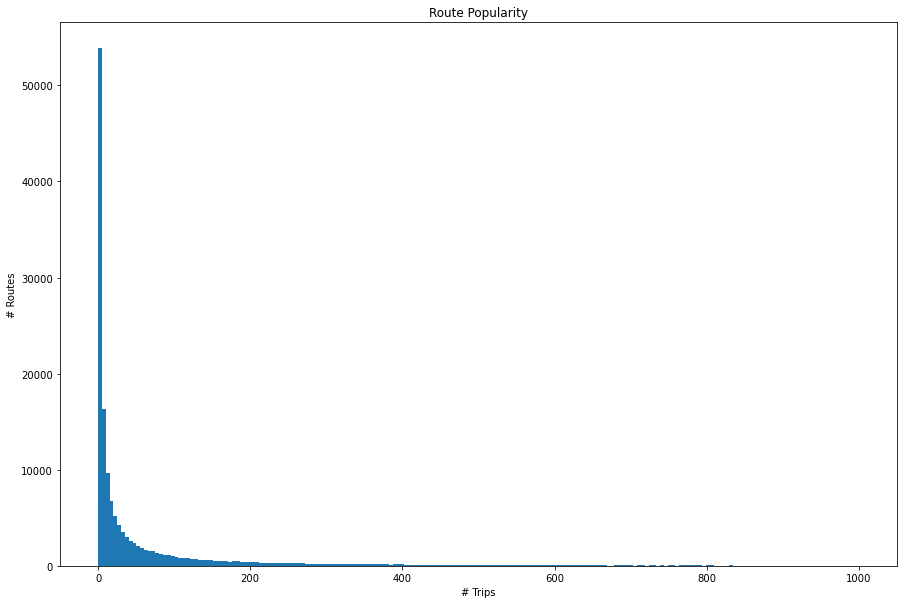

In [649]:
percent_below_100 = len([i for i in trips_by_route if i<100]) / len(trips_by_route)
print("{:.0%}".format(percent_below_100), "of unique routes saw fewer than 100 trips.")

plt.hist(trips_by_route.values, bins=np.linspace(0, 1000, num=200))
plt.ylabel('# Routes')
plt.xlabel('# Trips')
plt.title('Route Popularity')

plt.show()




Most combinations of routes are not really that popular. Makes sense, but we will likely have issues predicting for some of the stations with less foot traffic. The data set is quite unbalanced.

#### Heatmaps

We can confirm the data by looking at it another way: plotted by latitude/ longitude.

<AxesSubplot:title={'center':'Starting Station Popularity'}, xlabel='start station longitude', ylabel='start station latitude'>

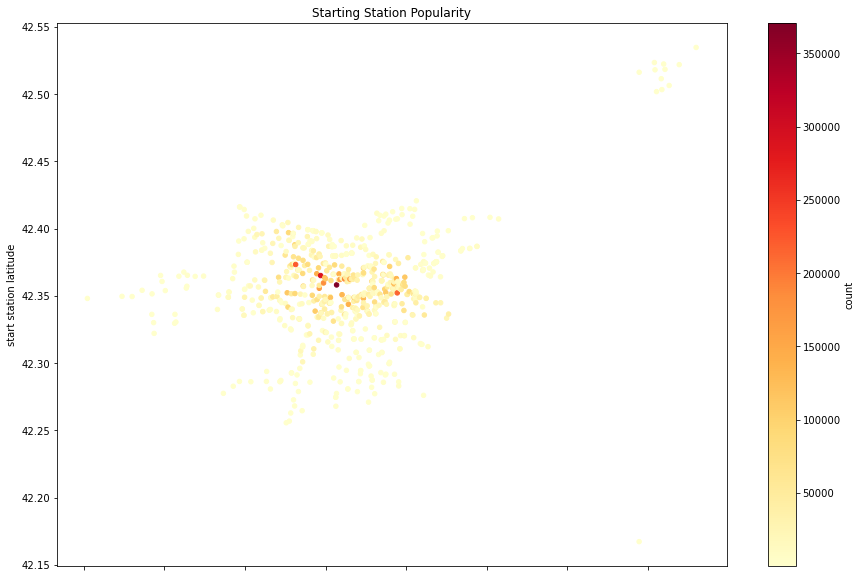

In [773]:
start_map = pd.DataFrame(trips_df.groupby(['start station longitude', 'start station latitude']).size().transpose().reset_index())
start_map = start_map.rename(columns={0:"count"})
start_map.plot(x="start station longitude", y="start station latitude", title="Starting Station Popularity", kind="scatter", c="count", colormap="YlOrRd")

In [ ]:
end_map = pd.DataFrame(trips_df.groupby(['end station longitude', 'end station latitude']).size().transpose().reset_index())
end_map = end_map.rename(columns={0:"count"})
end_map.plot(x="end station longitude", y="end station latitude", title="End Station Popularity", kind="scatter", c="count", colormap="YlOrRd")

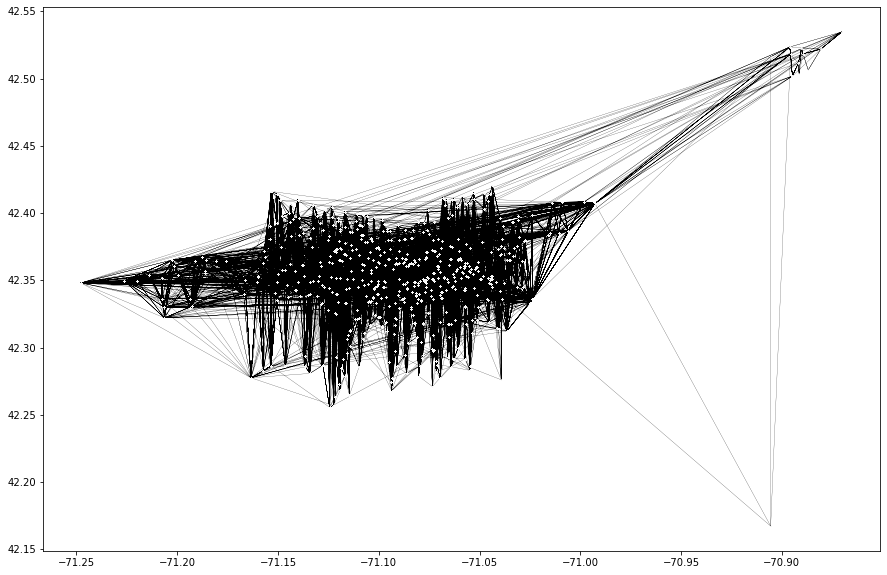

In [797]:
from matplotlib import cm
test = pd.DataFrame(trips_df.groupby(['start station longitude', 'start station latitude',
                 'end station longitude', 'end station latitude']).size().reset_index())

plt.plot(test['start station longitude'], 
         test['start station latitude'],
         test['end station longitude'],
         test['end station latitude'],
         marker = 'o', c="black", linewidth="0.2", 
         markersize="0.5", markeredgecolor="white")

Interpretation: most of routes are concentrated around City of Boston, although there are stations just outside the city (presumably around the commuter rail) 

## Time Series

<AxesSubplot:title={'center':'Trip count over Time'}, xlabel='starttime,starttime'>

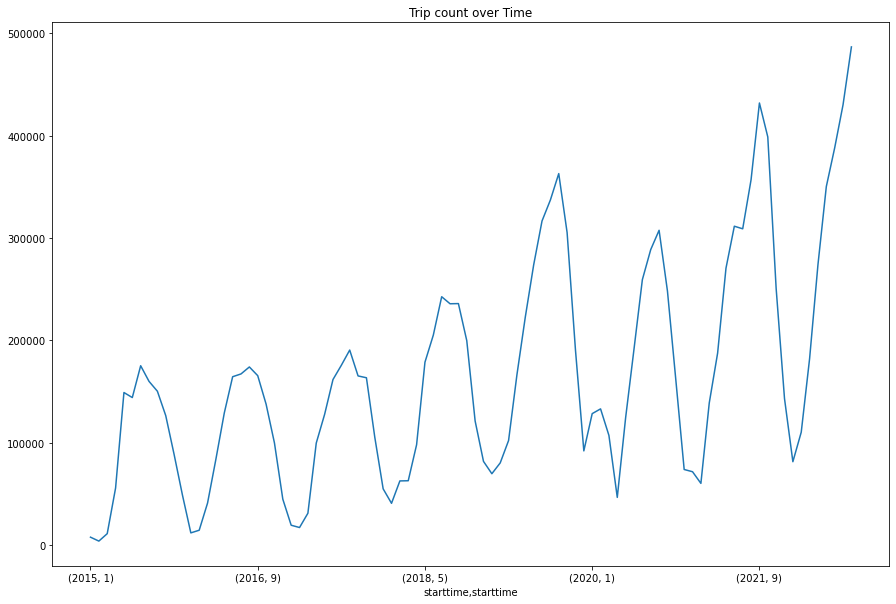

In [726]:
trip_yrhr = trips_df.groupby([trips_df['starttime'].dt.year, trips_df['starttime'].dt.month]).size()

trip_yrhr.plot(title="Trip count over Time")



**Trend Analysis**

* The number of trips is increasing YoY
* Clear evidence of seasonality - winter months show drop off
* Unusual behavior around March 2020, sharp drop instead of going up as following cycle

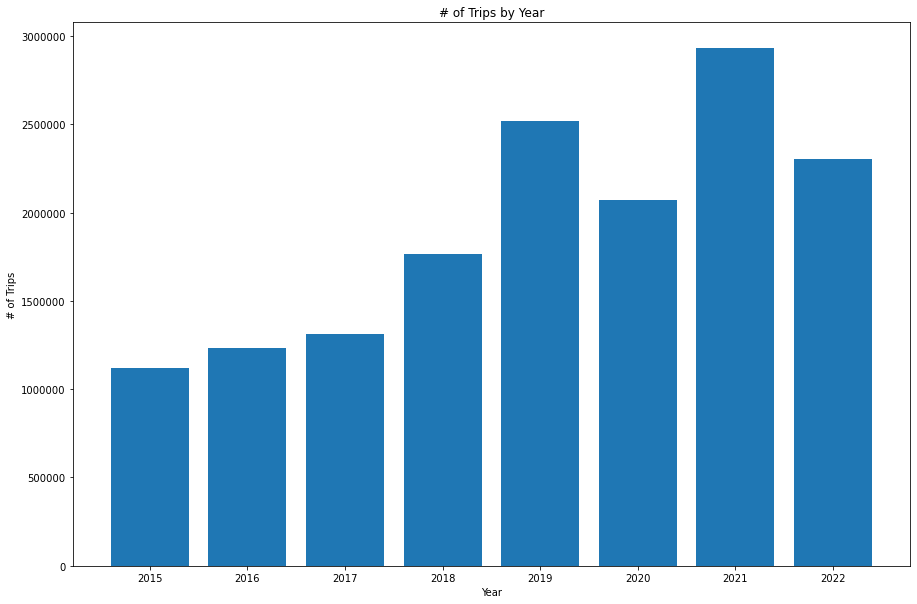

In [716]:
trip_years = trips_df.groupby(trips_df['starttime'].dt.year).size()
plt.bar(trip_years.index, trip_years)

plt.xlabel("Year")
plt.ylabel("# of Trips")
plt.title("# of Trips by Year")
plt.ticklabel_format(style='plain')


**Trend Analysis** 

* Fewer total trips in 2020
* 2022 looks fewer because year is still going on
* Growth Overall

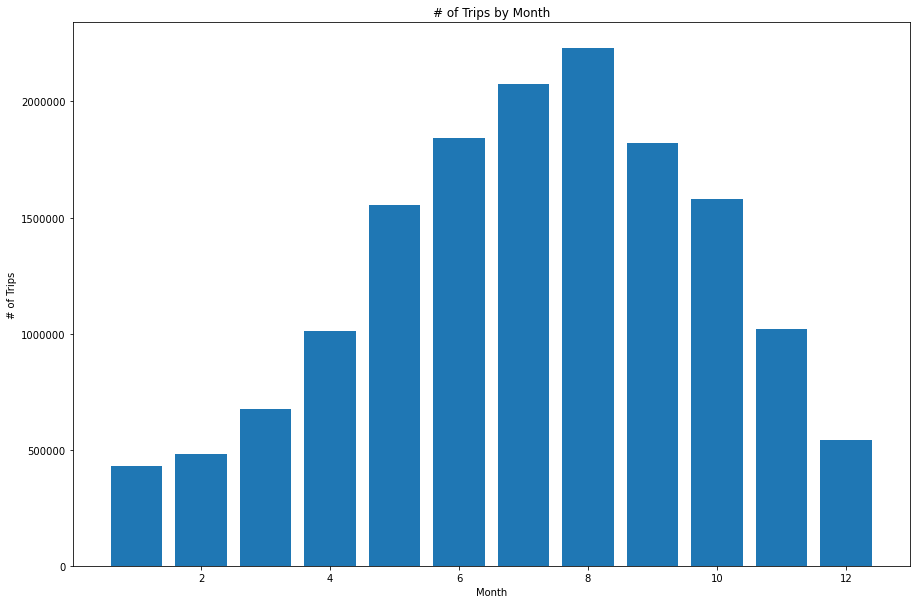

In [717]:
trip_months = trips_df.groupby(trips_df['starttime'].dt.month).size()
plt.bar(trip_months.index, trip_months)

plt.xlabel("Month")
plt.ylabel("# of Trips")
plt.title("# of Trips by Month")
plt.ticklabel_format(style='plain')

**Trend Analysis** 

* Lots of activity in summer months, but drops off in Winter time

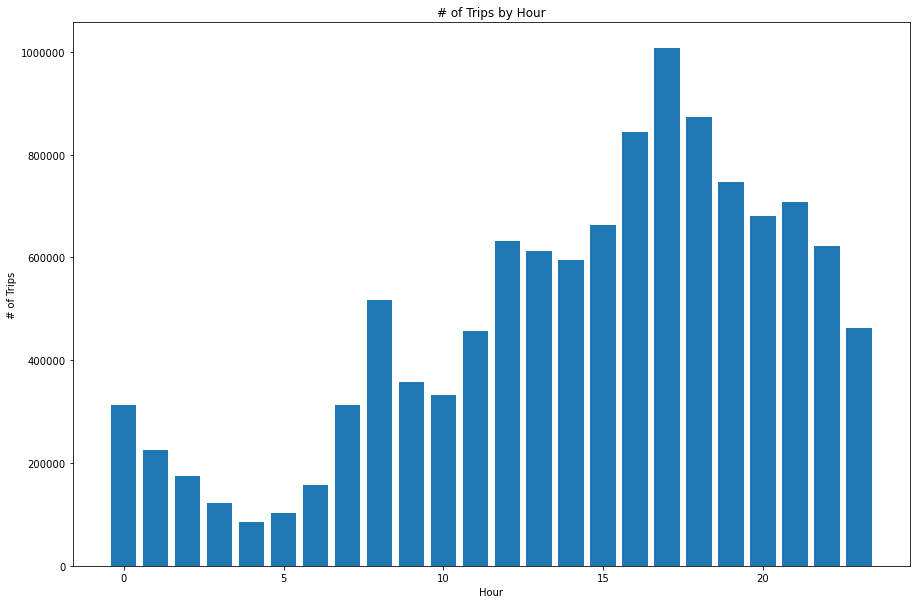

In [597]:
trip_hour = trips_df.groupby(trips_df['starttime'].dt.hour).size()
plt.bar(trip_hour.index, trip_hour)

plt.xlabel("Hour")
plt.ylabel("# of Trips")
plt.title("# of Trips by Hour")
plt.ticklabel_format(style='plain')


**Trend Analysis** 

* Actually fewer trips than expected in the mornings - but lots during commute toward home hrs. Looks like people are more willing to risk being late etc. in the evening getting home, but not getting to work (Makes sense as this is still a fairly new transit option)

In [727]:
bins = np.arange(0,max(trips_df['tripduration']), 5000)
groups = trips_df.groupby([trips_df['starttime'].dt.hour, pd.cut(trips_df.tripduration, bins)])
test = groups.size().unstack()
test

tripduration,"(0, 5000]","(5000, 10000]","(10000, 15000]","(15000, 20000]","(20000, 25000]","(25000, 30000]","(30000, 35000]","(35000, 40000]","(40000, 45000]","(45000, 50000]","(50000, 55000]","(55000, 60000]","(60000, 65000]","(65000, 70000]","(70000, 75000]","(75000, 80000]","(80000, 85000]"
starttime,,,,,,,,,,,,,,,,,
0,335164,3449,378,126,97,97,93,107,147,102,83,78,60,34,42,30,9
1,239530,2608,289,119,87,91,116,141,124,102,65,56,44,49,39,23,17
2,182094,2043,251,98,82,112,148,144,109,83,83,68,42,45,30,12,14
3,123915,1559,146,58,51,106,114,130,101,76,45,35,35,26,21,13,7
4,88032,1126,146,59,70,112,87,110,90,62,52,33,24,27,18,7,7
5,119566,1033,145,65,122,142,137,117,91,69,48,36,20,22,11,14,6
6,230683,1032,142,117,114,118,126,117,62,51,31,35,20,16,10,3,7
7,514007,1384,272,170,90,121,109,90,39,27,21,15,7,3,3,2,8
8,851206,2760,681,291,176,169,199,117,45,25,13,2,3,1,4,5,16


## User Demographics

Confirming age and gender demographics as studied by SFU

In [728]:
gender = trips_df.groupby(['gender']).size()

gender.rename(index={0: "unknown", 1: "male", 2: "female"})

gender
unknown    1223588
male       5319654
female     1829391
dtype: int64

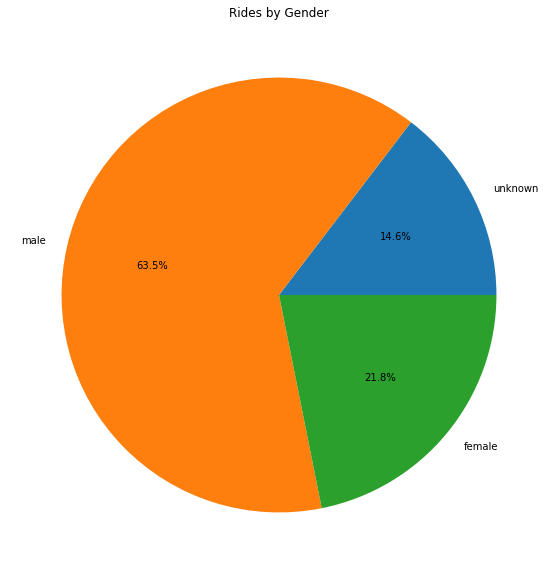

In [729]:
plt.pie(gender, labels=["unknown", "male", "female"], autopct='%1.1f%%')
plt.title("Rides by Gender")
plt.show()

In [770]:
trips_demo = trips_df[(trips_df['birth year'].notna()) & (trips_df['birth year'] != r"\N")]

trips_demo['age'] = 2022 - pd.to_numeric(trips_demo['birth year'])

In [771]:
bins = [16, 30, 50, 70, 100, 120]
groups = trips_demo.groupby(['gender', pd.cut(trips_demo.age, bins)])
gender_and_age = groups.size().unstack()
gender_and_age = gender_and_age.rename(index={0: "unknown", 1: "male", 2: "female"})
gender_and_age

age,"(16, 30]","(30, 50]","(50, 70]","(70, 100]","(100, 120]"
gender,,,,,
unknown,13312,22163,498229,132,11
male,1480440,2990398,788705,58373,273
female,554059,1020691,248351,5891,22


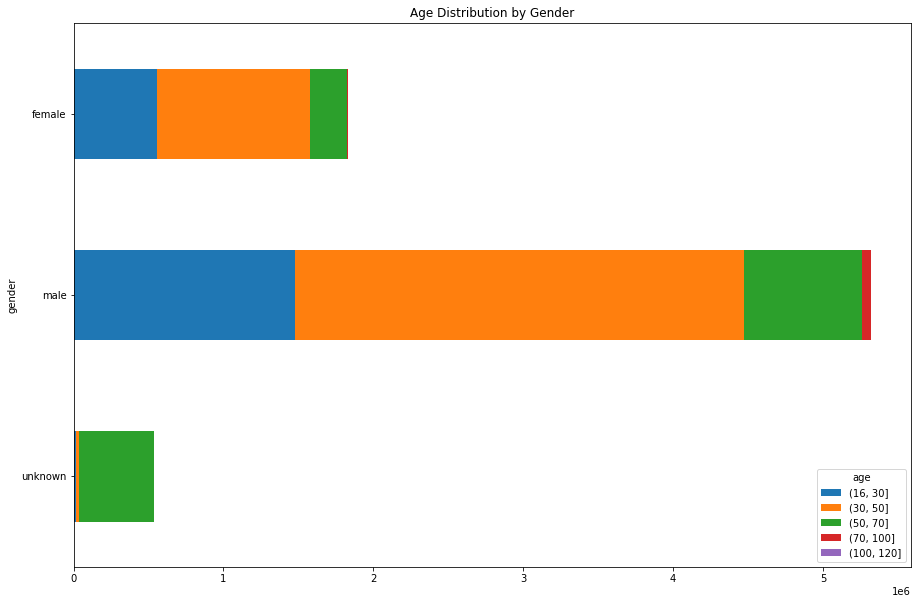

In [772]:
gender_and_age.plot(kind="barh",stacked=True).legend(
    loc='lower right', title="age")
plt.title("Age Distribution by Gender")
plt.show()

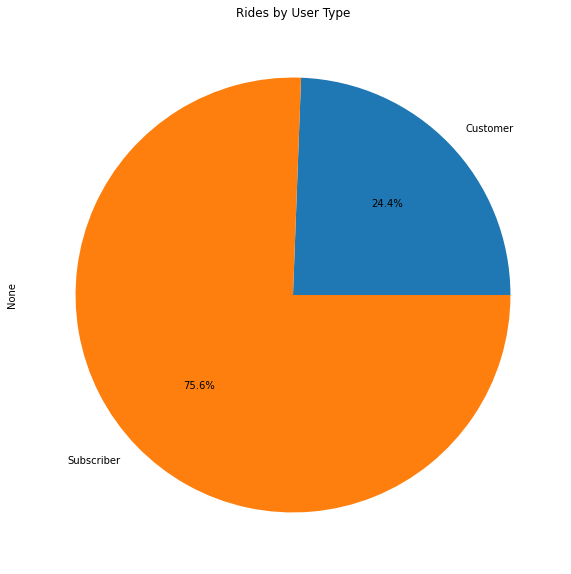

In [18]:
customer = trips_df.groupby('usertype').size()
customer.plot(kind="pie", autopct='%1.1f%%')
plt.title("Rides by User Type")
plt.show()

### Initial Conclusions

* Most hypotheses confirmed: 
    * people tend to bike during commute hours  
    * Most trips are 30 min max
    * Clear time element to consider: weather / seasonality impact. 
    * Type of people biking: mostly young men, looks like a lot of students or faculty
    
    
   
* Interesting discoveries:
    * Will be missing a lot of data for less popular stations, as most active routes are in city center, school, etc.
    * Missing user demographic data for 
    * Fewer people bike in the mornings overall 
    * Data actually can be read and consumed locally